In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv('TUANDROMD_chi_square.csv')

In [27]:
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Khởi tạo mô hình KNN với số lượng láng giềng k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

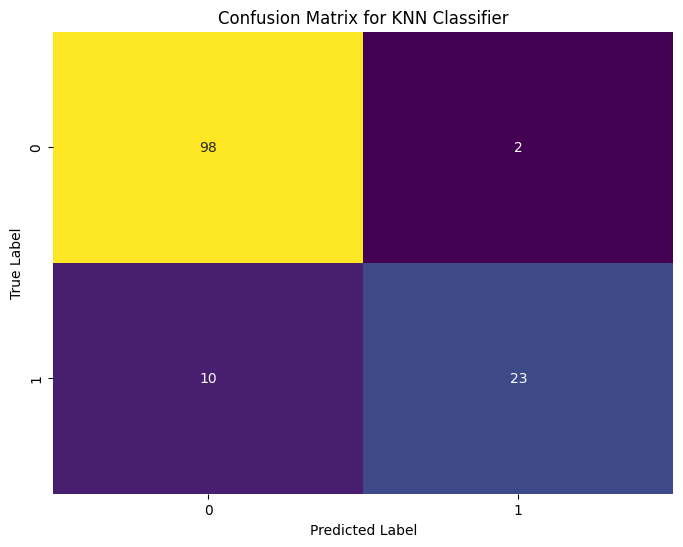

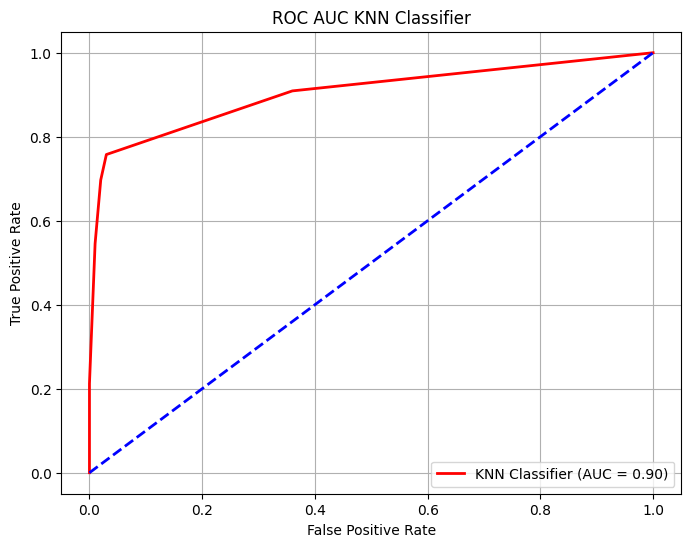

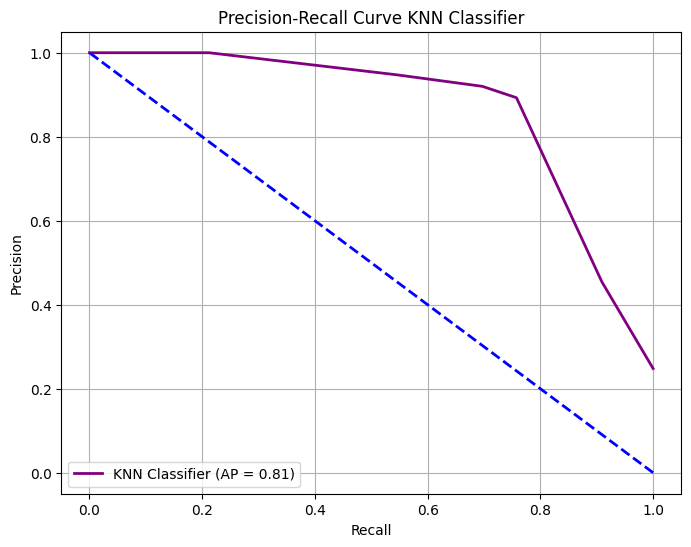

In [29]:
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]
# Ma trận nhầm lẫn (Confusion Matrix Heatmap)
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Biểu đồ ROC (ROC Curve)
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
roc_auc = roc_auc_score(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'KNN Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC KNN Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Biểu đồ Precision-Recall (Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(y_test, y_prob_knn)
average_precision = average_precision_score(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'KNN Classifier (AP = {average_precision:.2f})')
plt.plot([1, 0], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve KNN Classifier')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [30]:
# Tính Precision, Recall, F1-score, và Accuracy
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)

# In ra kết quả
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")

Precision: 0.920
Recall: 0.697
F1-score: 0.793
Accuracy: 0.910


In [31]:
# Tính toán MAE, MSE và R2-score
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.09022556390977443
Mean Squared Error (MSE): 0.09022556390977443
R-squared (R2): 0.5163636363636364


In [32]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=5, max_depth=None, random_state=42)
#Huấn luyện mô hình rf
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

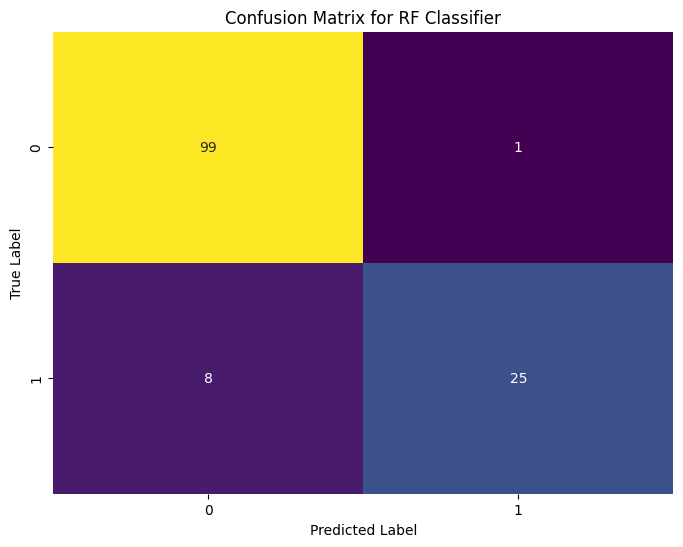

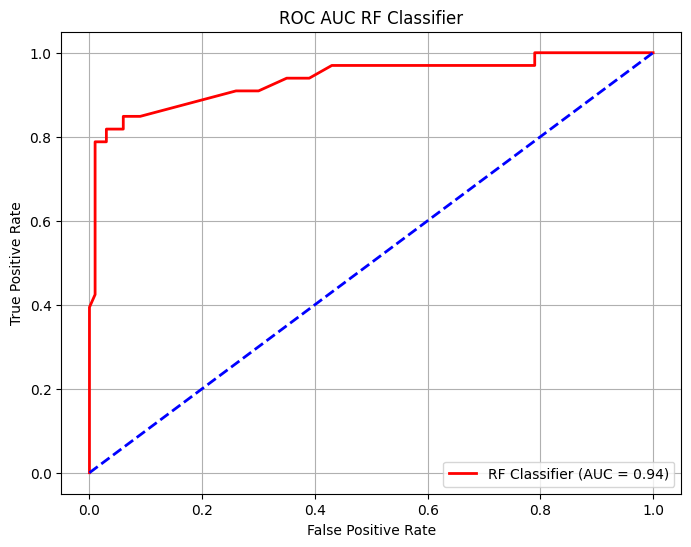

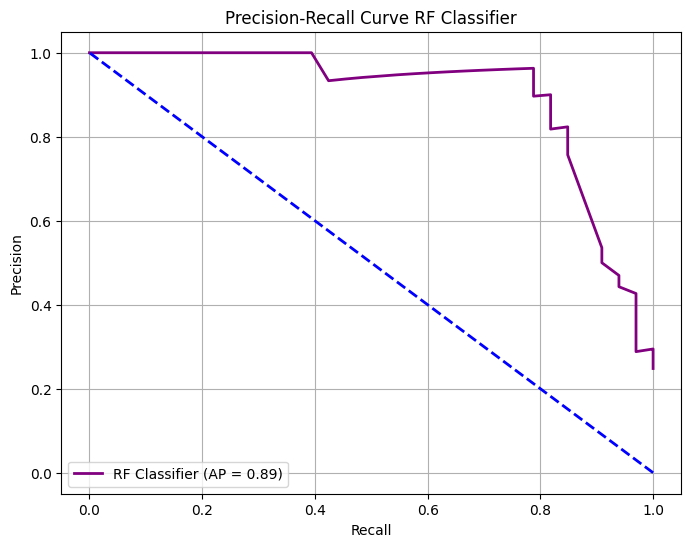

In [33]:
y_pred_rf = model.predict(X_test)
y_prob_rf = model.predict_proba(X_test)[:, 1]
# Ma trận nhầm lẫn (Confusion Matrix Heatmap)
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix for RF Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Biểu đồ ROC (ROC Curve)
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'RF Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC RF Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Biểu đồ Precision-Recall (Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)
average_precision = average_precision_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'RF Classifier (AP = {average_precision:.2f})')
plt.plot([1, 0], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve RF Classifier')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [34]:
# Tính Precision, Recall, F1-score, và Accuracy
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)

# In ra kết quả
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")

Precision: 0.962
Recall: 0.758
F1-score: 0.847
Accuracy: 0.932


In [35]:
# Tính toán MAE, MSE và R2-score
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.06766917293233082
Mean Squared Error (MSE): 0.06766917293233082
R-squared (R2): 0.6372727272727272


In [36]:
#  huấn luyện mô hình SVM
svc = SVC(kernel='linear',probability=True)
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

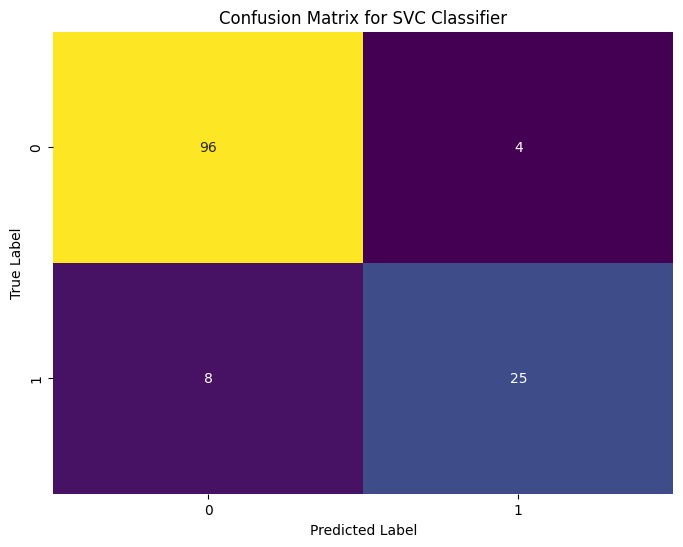

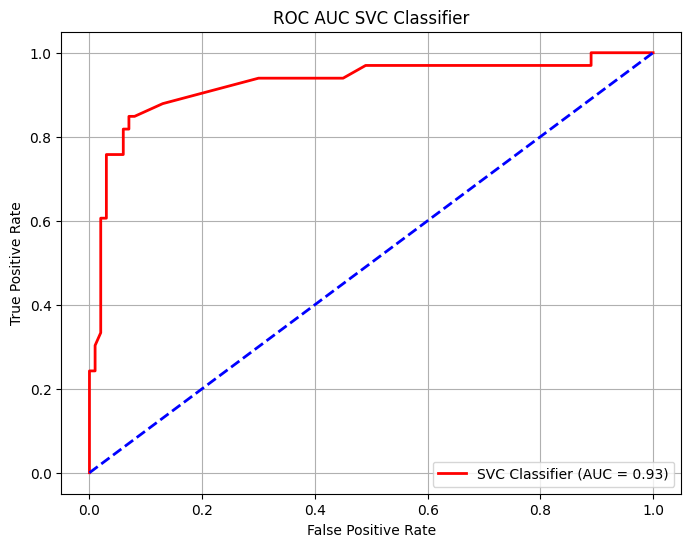

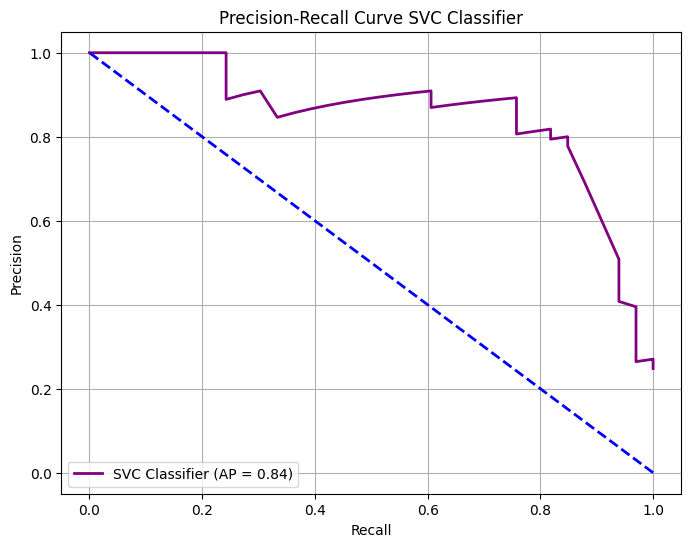

In [37]:
y_pred_svc = svc.predict(X_test)
y_prob_svc = svc.predict_proba(X_test)[:, 1]
# Ma trận nhầm lẫn (Confusion Matrix Heatmap)
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix for SVC Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Biểu đồ ROC (ROC Curve)
fpr, tpr, _ = roc_curve(y_test, y_prob_svc)
roc_auc = roc_auc_score(y_test, y_prob_svc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'SVC Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC SVC Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Biểu đồ Precision-Recall (Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(y_test, y_prob_svc)
average_precision = average_precision_score(y_test, y_prob_svc)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'SVC Classifier (AP = {average_precision:.2f})')
plt.plot([1, 0], [0, 1], color='blue', linestyle='--', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve SVC Classifier')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [38]:
# Tính Precision, Recall, F1-score, và Accuracy
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
accuracy = accuracy_score(y_test, y_pred_svc)

# In ra kết quả
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")

Precision: 0.862
Recall: 0.758
F1-score: 0.806
Accuracy: 0.910


In [39]:
# Tính toán MAE, MSE và R2-score
mae = mean_absolute_error(y_test, y_pred_svc)
mse = mean_squared_error(y_test, y_pred_svc)
r2 = r2_score(y_test, y_pred_svc)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 0.09022556390977443
Mean Squared Error (MSE): 0.09022556390977443
R-squared (R2): 0.5163636363636364


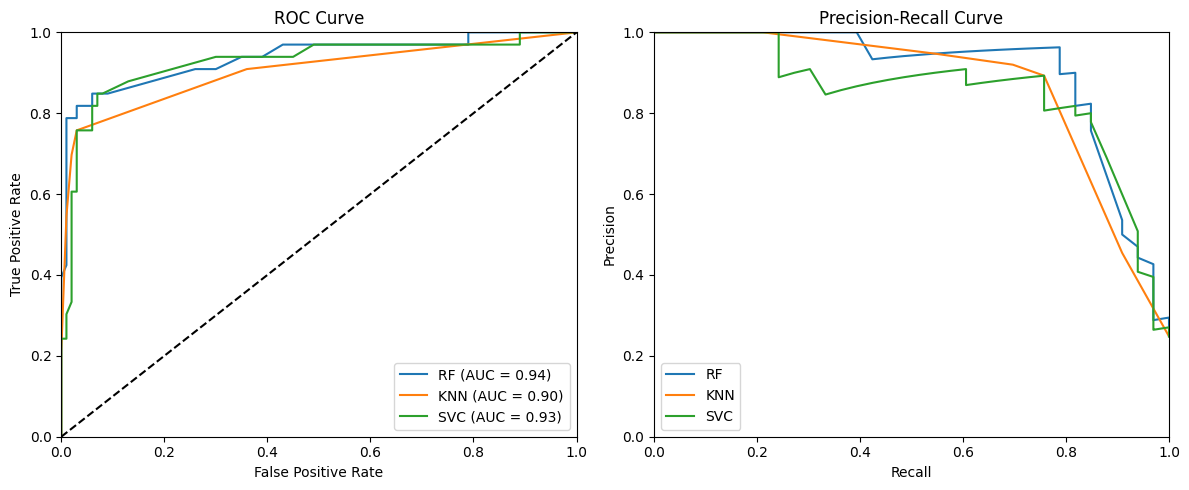

In [40]:
# Dự đoán xác suất
rf_probs = model.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
svc_probs = svc.predict_proba(X_test)[:, 1]

# ROC Curve and AUC score
rf_auc = roc_auc_score(y_test, rf_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
svc_auc = roc_auc_score(y_test, svc_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)

# Precision-Recall Curve
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
svc_precision, svc_recall, _ = precision_recall_curve(y_test, svc_probs)

# Vẽ biểu đồ ROC
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(rf_fpr, rf_tpr, label=f'RF (AUC = {rf_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(svc_fpr, svc_tpr, label=f'SVC (AUC = {svc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")


# Vẽ biểu đồ Precision-Recall
plt.subplot(1, 2, 2)
plt.plot(rf_recall, rf_precision, label=f'RF')
plt.plot(knn_recall, knn_precision, label=f'KNN')
plt.plot(svc_recall, svc_precision, label=f'SVC')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()